# Tests to evaluate the Reinforcement Learning models performances

## Imports

In [37]:
import random
from MCTS import *
import numpy as np
from TDLambda_LVFA import *
import matplotlib.pyplot as plt
from CheckersRL import CheckersRL

In [29]:
env = CheckersRL()

In [30]:
player = CheckersRL.WHITE_PAWN

In [66]:
def display_rewards(episodes: int, rewards: float, title: str):
    """
    Displays the rewards throughout the episodes

    @param episodes: The number of episodes
    @param rewards: The episodes rewards
    @param title: The plot title
    """
    plt.plot([i+1 for i in range(episodes)], rewards, label="rewards")
    plt.plot([i+1 for i in range(episodes)],  
            [np.mean(rewards) for _ in range(episodes)], "r", label="mean_reward")
    plt.xlabel("Episodes")
    plt.ylabel("Rewards")
    plt.title(f"{title} - Mean reward: {np.mean(rewards):.2f}")
    plt.legend()
    plt.show()

## I - Two random agents

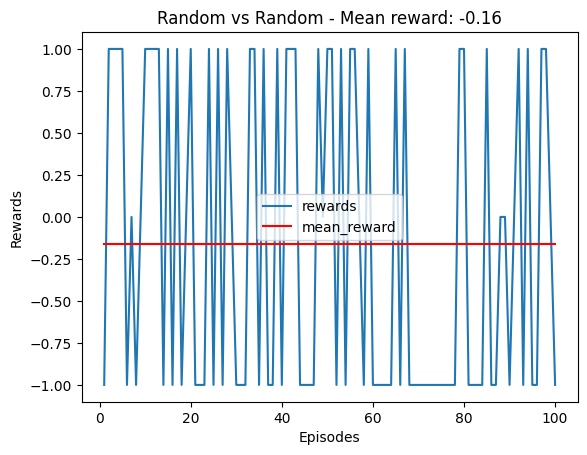

In [68]:
rewards = []
episodes = 100
for _ in range(episodes):
    state, cur_player = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = random.choice(env.available_moves(state, cur_player))
        state, reward, done, cur_player = env.step(action)
        total_reward += reward
    rewards.append(total_reward)

display_rewards(episodes, rewards, title="Random vs Random")


## II - MCTS agent vs random agent 

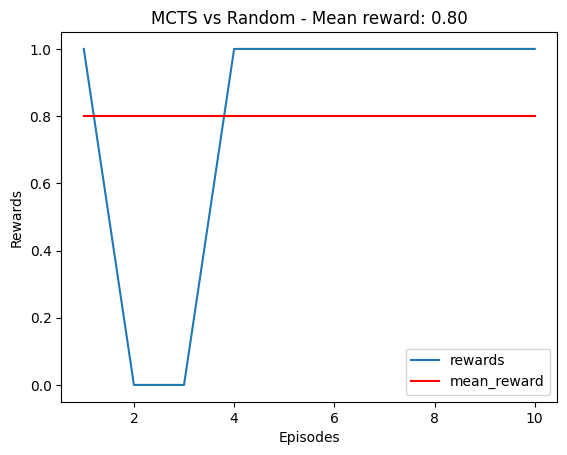

In [70]:
rewards = []
episodes = 10
for _ in range(episodes):
    state, cur_player = env.reset()
    done = False
    total_reward = 0
    while not done:
        if cur_player == player:
            action, root = mcts(deepcopy(state), cur_player, env, iters=100)
        else:
            action = random.choice(env.available_moves(state, cur_player))
        state, reward, done, cur_player = env.step(action)
        total_reward += reward
    rewards.append(total_reward)

display_rewards(episodes, rewards, title="MCTS vs Random")

## III - MCTS agent vs MCTS agent

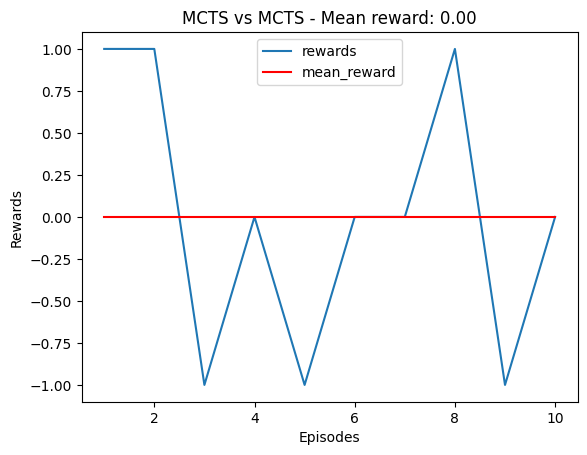

In [77]:
rewards = []
episodes = 10
for _ in range(episodes):
    state, cur_player = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, root = mcts(deepcopy(state), cur_player, env, iters=100)
        state, reward, done, cur_player = env.step(action)
        total_reward += reward
    rewards.append(total_reward)

display_rewards(episodes, rewards, title="MCTS vs MCTS")

## IV - TD(λ) LVFA agent vs random agent

In [72]:
agent = TDLambda_LVFA.load('model.pkl')

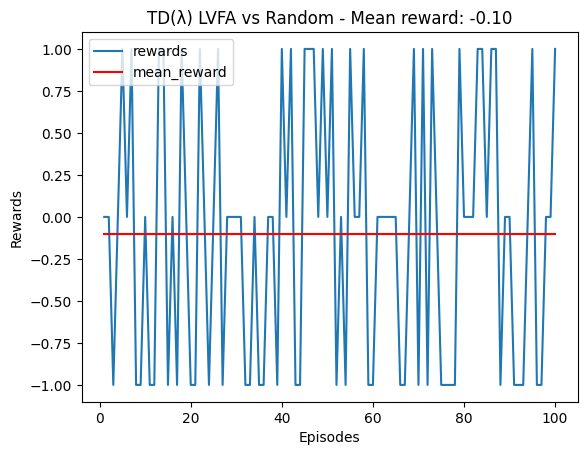

In [74]:
rewards = []
episodes = 100
for _ in range(episodes):
    state, cur_player = env.reset()
    done = False
    total_reward = 0
    while not done:
        if cur_player == player:
            action = agent.policy(state, cur_player)
        else:
            action = random.choice(env.available_moves(state, cur_player))
        state, reward, done, cur_player = env.step(action)
        total_reward += reward
    rewards.append(total_reward)

display_rewards(episodes, rewards, title="TD(λ) LVFA vs Random")

## V - TD(λ) LVFA agent vs MCTS agent

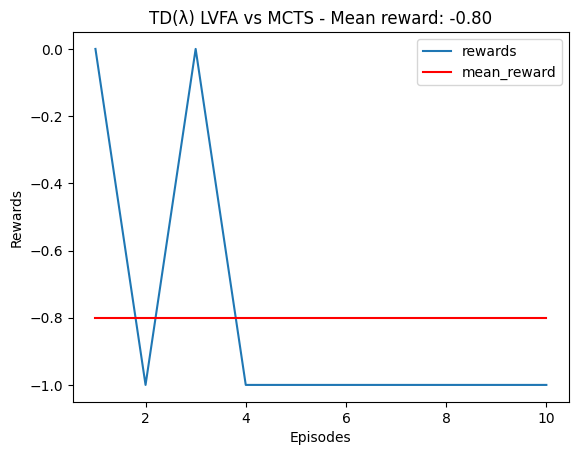

In [79]:
rewards = []
episodes = 10
for _ in range(episodes):
    state, cur_player = env.reset()
    done = False
    total_reward = 0
    while not done:
        if cur_player == player:
            action = agent.policy(state, cur_player)
        else:
            action, root = mcts(deepcopy(state), cur_player, env, iters=100)
        state, reward, done, cur_player = env.step(action)
        total_reward += reward
    rewards.append(total_reward)

display_rewards(episodes, rewards, title="TD(λ) LVFA vs MCTS")